In [9]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import random

import os
direc = r'G:\My Drive\MasterThesis'
os.chdir(direc)
path_data_out =  os.path.join(os.getcwd(), 'Output/Plots/TrainTestStrategy')

random.seed(123)

In [10]:
# Options for all plots
color_train='green'
color_v_train='lightgreen'
color_validate='blue'
color_test='red'

fig_width = 4
fig_height = 3

x_lims = [0, 120]
y_lims = [0, 120]

# Set limits for shapes
factor_sh=10/12
x_width_sh = (x_lims[1]-x_lims[0])*factor_sh
x_lims_sh = [x_lims[0]+((x_lims[1]-x_lims[0])-x_width_sh)/2, x_width_sh+x_lims[0]+((x_lims[1]-x_lims[0])-x_width_sh)/2]

y_height_sh = (y_lims[1]-y_lims[0])*factor_sh
y_lims_sh = [y_lims[0]+((y_lims[1]-y_lims[0])-y_height_sh)/2, y_height_sh+y_lims[0]+((y_lims[1]-y_lims[0])-y_height_sh)/2]


In [11]:
def tidy_plot(ax, x_lims):
    # Remove the top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Remove ticks and tick labels on both axes
    ax.tick_params(bottom=False, left=False, labelleft=False)
    ax.set_xticks([x_lims[1]])
    ax.set_xticklabels([''])

    # # # Set the linewidth of the Y axis spine to 0
    # ax.spines['left'].set_linewidth(0)

    # Set Y axis title
    # ax.set_ylabel('CV iteration')

    # Set X axis title
    plt.xlabel('Time index', labelpad=0)
    
    # Add an arrow to the X axis at the right end
    # ax.annotate('', xy=(1, 0), xycoords='axes fraction',
    #             xytext=(0.99999, 0), textcoords='axes fraction',
    #             arrowprops=dict(arrowstyle='->'))
    ax.plot((1), (0), ls="", marker=">", ms=3, color="k",
            transform=ax.get_yaxis_transform(), clip_on=False)

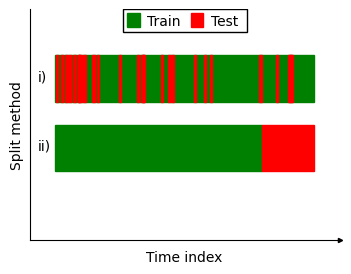

In [12]:
# PLOT 1

# Create a figure and axis
fig, ax = plt.subplots(figsize=(fig_width, fig_height))

# Set axis limits
ax.set_xlim(x_lims)
ax.set_ylim(y_lims)

# Green rectangle 1
x_pos=x_lims_sh[0]
y_pos=y_lims[1]*0.6
width=x_width_sh
height=(y_lims[1]*0.2)
gr1 = patches.Rectangle((x_pos, y_pos), width=width, height=height, color=color_train)
ax.add_patch(gr1)

# Green rectangle 3
x_pos=x_lims_sh[0]
y_pos=y_lims[1]*0.3
width=x_width_sh*0.8
height=(y_lims[1]*0.2)
gr2 = patches.Rectangle((x_pos, y_pos), width=width, height=height, 
                        color=color_train)
ax.add_patch(gr2)

# Red rectangles 1
y_pos=gr1.get_y()
height=gr1.get_height()

total_width=gr1.get_width()/4 # 80-20 split, 1:4 ratio
num_rectangles = 27
width=total_width/num_rectangles

for _ in range(num_rectangles):
    x_pos = random.uniform(gr1.get_x(), gr1.get_x()+gr1.get_width())  # Generate random x_position within the range of the green rectangle
    rr_n = patches.Rectangle((x_pos, y_pos), width=width, height=height, color=color_test)
    ax.add_patch(rr_n)

# Red rectangle 2
x_pos=gr2.get_x() + gr2.get_width()
y_pos=gr2.get_y()
width=gr2.get_width()/4 # 80-20 split, 1:4 ratio
height=gr2.get_height()
rr2 = patches.Rectangle((x_pos, y_pos), width=width, height=height, color=color_test)
ax.add_patch(rr2)

# Tidy plot
tidy_plot(ax, x_lims=x_lims)

# Set Y axis title
ax.set_ylabel('Split method')

# Add anotations
ax.annotate('i)', xy=(gr1.get_x()-gr1.get_width()/15, gr1.get_y() + gr1.get_height()/2.2))
ax.annotate('ii)', xy=(gr1.get_x()-gr1.get_width()/15, gr2.get_y() + gr2.get_height()/2.2))

# Create a legend-like box
legend_box = patches.Rectangle((x_lims[1]*0.3, y_lims[1]*0.9), width=x_lims[1]/2.5, 
                               height=y_lims[1]/10, edgecolor='black', facecolor='none')
ax.add_patch(legend_box)

# Add squares and labels to the legend box
color_square1 = patches.Rectangle((legend_box.get_x()*1.05, legend_box.get_y()*1.025), 
        width=legend_box.get_width()*0.1, height=legend_box.get_height()*0.6, 
        color=color_train)
ax.add_patch(color_square1)
ax.text(color_square1.get_x()*1.2, color_square1.get_y()*1.03, 'Train', 
        verticalalignment='center', horizontalalignment='left')

color_square2 = patches.Rectangle((color_square1.get_x()*1.65, color_square1.get_y()), 
        width=legend_box.get_width()*0.1, height=legend_box.get_height()*0.6, 
        color=color_test)
ax.add_patch(color_square2)
ax.text(color_square2.get_x()*1.125, color_square2.get_y()*1.03, 'Test', 
        verticalalignment='center', horizontalalignment='left')


# Save plot
path_ =  os.path.join(os.getcwd(), path_data_out, 'NoTimeVSTime.png')
plt.savefig(path_, dpi=250)

# Display the plot
plt.show()

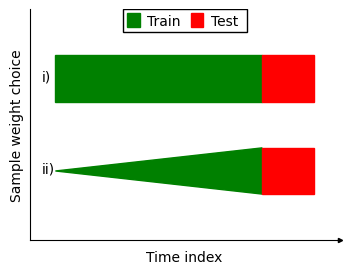

In [116]:
# PLOT 1

# Create a figure and axis
fig, ax = plt.subplots(figsize=(fig_width, fig_height))

# Set axis limits
ax.set_xlim(x_lims)
ax.set_ylim(y_lims)

# Green rectangle 1
x_pos=x_lims_sh[0]
y_pos=y_lims[1]*0.6
width=x_width_sh*0.8
height=(y_lims[1]*0.2)
gr1 = patches.Rectangle((x_pos, y_pos), width=width, height=height, 
                        color=color_train)
ax.add_patch(gr1)

# Red rectangle 1
x_pos=gr1.get_x() + gr1.get_width()
y_pos=gr1.get_y()
width=gr1.get_width()/4 # 80-20 split, 1:4 ratio
height=gr1.get_height()
rr1 = patches.Rectangle((x_pos, y_pos), width=width, height=height, color=color_test)
ax.add_patch(rr1)

# Train triangle
#   Define the points based on the points of the rectangle
x_pos=gr1.get_x()
y_pos=y_lims[1]*0.2
width=gr1.get_width()
height=gr1.get_height()
gr2 = patches.Rectangle((x_pos, y_pos), width=width, height=height, color=color_train)

points = [[x_pos, y_pos+gr1.get_height()*0.5], [x_pos+width, y_pos], [x_pos+width, y_pos+gr1.get_height()]] #the points to trace the edges.
polygon_tr= plt.Polygon(points,  color='green')
ax.add_patch(polygon_tr)

# Red rectangle 2
x_pos=gr2.get_x() + gr2.get_width()
y_pos=gr2.get_y()
width=gr2.get_width()/4 # 80-20 split, 1:4 ratio
height=gr2.get_height()
rr1 = patches.Rectangle((x_pos, y_pos), width=width, height=height, color=color_test)
ax.add_patch(rr1)



# Tidy plot
tidy_plot(ax, x_lims=x_lims)

# Set Y axis title
ax.set_ylabel('Sample weight choice')

# Add anotations
ax.annotate('i)', xy=(gr1.get_x()-gr1.get_width()/15, gr1.get_y() + gr1.get_height()/2.2))
ax.annotate('ii)', xy=(gr1.get_x()-gr1.get_width()/15, gr2.get_y() + gr2.get_height()/2.2))

# Create a legend-like box
legend_box = patches.Rectangle((x_lims[1]*0.3, y_lims[1]*0.9), width=x_lims[1]/2.5, 
                               height=y_lims[1]/10, edgecolor='black', facecolor='none')
ax.add_patch(legend_box)

# Add squares and labels to the legend box
color_square1 = patches.Rectangle((legend_box.get_x()*1.05, legend_box.get_y()*1.025), 
        width=legend_box.get_width()*0.1, height=legend_box.get_height()*0.6, 
        color=color_train)
ax.add_patch(color_square1)
ax.text(color_square1.get_x()*1.2, color_square1.get_y()*1.03, 'Train', 
        verticalalignment='center', horizontalalignment='left')

color_square2 = patches.Rectangle((color_square1.get_x()*1.65, color_square1.get_y()), 
        width=legend_box.get_width()*0.1, height=legend_box.get_height()*0.6, 
        color=color_test)
ax.add_patch(color_square2)
ax.text(color_square2.get_x()*1.125, color_square2.get_y()*1.03, 'Test', 
        verticalalignment='center', horizontalalignment='left')


# Save plot
path_ =  os.path.join(os.getcwd(), path_data_out, 'NoWeightVsWeight.png')
plt.savefig(path_, dpi=250)

# Display the plot
plt.show()

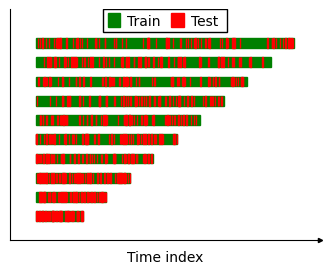

In [117]:
# PLOT 2

# Create a figure and axis
fig, ax = plt.subplots(figsize=(fig_width, fig_height))

# Set axis limits
ax.set_xlim(x_lims)
ax.set_ylim(y_lims)

# Set partitions
num_partitions = 10
test_size=x_width_sh*(1/(num_partitions+1))
bar_height=y_height_sh*0.5/num_partitions

# Draw shapes
for i in range(1, num_partitions+1):

    # Train rectangle
    x_pos=x_lims_sh[0]
    y_pos=y_lims_sh[0]+bar_height*(2*i-2)
    width=test_size*(i+1)
    height=bar_height
    tr_n = patches.Rectangle((x_pos, y_pos), width=width, height=height, color=color_train)
    ax.add_patch(tr_n)

    # Test rectangles
    y_pos=tr_n.get_y()
    height=tr_n.get_height()

    total_width=test_size
    num_rectangles = 75
    width=total_width/num_rectangles

    for _ in range(num_rectangles):
        x_pos = random.uniform(tr_n.get_x(), tr_n.get_x()+tr_n.get_width())  # Generate random x_position within the range of the green rectangle
        rr_n = patches.Rectangle((x_pos, y_pos), width=width, height=height, color=color_test)
        ax.add_patch(rr_n)

# Tidy plot
tidy_plot(ax, x_lims=x_lims)

# Create a legend-like box
legend_box = patches.Rectangle((x_lims[1]*0.3, y_lims[1]*0.9), width=x_lims[1]/2.5, 
                               height=y_lims[1]/10, edgecolor='black', facecolor='none')
ax.add_patch(legend_box)

# Add squares and labels to the legend box
color_square1 = patches.Rectangle((legend_box.get_x()*1.05, legend_box.get_y()*1.025), 
        width=legend_box.get_width()*0.1, height=legend_box.get_height()*0.6, 
        color=color_train)
ax.add_patch(color_square1)
ax.text(color_square1.get_x()*1.2, color_square1.get_y()*1.03, 'Train', 
        verticalalignment='center', horizontalalignment='left')

color_square2 = patches.Rectangle((color_square1.get_x()*1.65, color_square1.get_y()), 
        width=legend_box.get_width()*0.1, height=legend_box.get_height()*0.6, 
        color=color_test)
ax.add_patch(color_square2)
ax.text(color_square2.get_x()*1.125, color_square2.get_y()*1.03, 'Test', 
        verticalalignment='center', horizontalalignment='left')

# Save plot
path_ =  os.path.join(os.getcwd(), path_data_out, 'Rolling_origin_recalibration_NoTime.png')
plt.savefig(path_, dpi=250)

# Display the plot
plt.show()

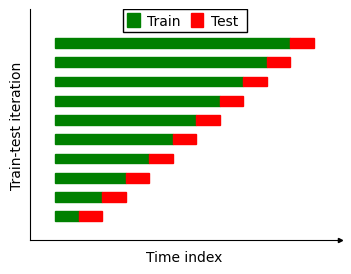

In [118]:
# PLOT 3

# Create a figure and axis
fig, ax = plt.subplots(figsize=(fig_width, fig_height))

# Set axis limits
ax.set_xlim(x_lims)
ax.set_ylim(y_lims)

# Set partitions
num_partitions = 10
test_size=x_width_sh*(1/(num_partitions+1))
bar_height=y_height_sh*0.5/num_partitions

# Draw shapes
for i in range(1, num_partitions+1):

    # Train rectangle
    x_pos=x_lims_sh[0]
    y_pos=y_lims_sh[0]+bar_height*(2*i-2)
    width=test_size*i
    height=bar_height
    tr_n = patches.Rectangle((x_pos, y_pos), width=width, height=height, color=color_train)
    ax.add_patch(tr_n)

    # Test rectangle
    x_pos=tr_n.get_x()+tr_n.get_width()
    y_pos=tr_n.get_y()
    width=test_size
    height=bar_height
    te_n = patches.Rectangle((x_pos, y_pos), width=width, height=height, color=color_test)
    ax.add_patch(te_n)

# Tidy plot
tidy_plot(ax, x_lims=x_lims)

# Set Y axis title
ax.set_ylabel('Train-test iteration')

# Create a legend-like box
legend_box = patches.Rectangle((x_lims[1]*0.3, y_lims[1]*0.9), width=x_lims[1]/2.5, 
                               height=y_lims[1]/10, edgecolor='black', facecolor='none')
ax.add_patch(legend_box)

# Add squares and labels to the legend box
color_square1 = patches.Rectangle((legend_box.get_x()*1.05, legend_box.get_y()*1.025), 
        width=legend_box.get_width()*0.1, height=legend_box.get_height()*0.6, 
        color=color_train)
ax.add_patch(color_square1)
ax.text(color_square1.get_x()*1.2, color_square1.get_y()*1.03, 'Train', 
        verticalalignment='center', horizontalalignment='left')

color_square2 = patches.Rectangle((color_square1.get_x()*1.65, color_square1.get_y()), 
        width=legend_box.get_width()*0.1, height=legend_box.get_height()*0.6, 
        color=color_test)
ax.add_patch(color_square2)
ax.text(color_square2.get_x()*1.125, color_square2.get_y()*1.03, 'Test', 
        verticalalignment='center', horizontalalignment='left')

# Save plot
path_ =  os.path.join(os.getcwd(), path_data_out, 'Rolling_origin_recalibration.png')
plt.savefig(path_, dpi=250)

# Display the plot
plt.show()

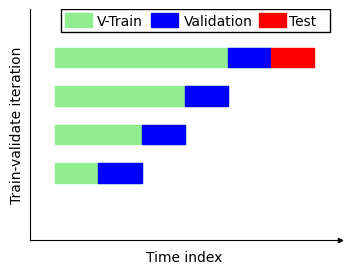

In [119]:
# PLOT 3

# Create a figure and axis
fig, ax = plt.subplots(figsize=(fig_width, fig_height))

# Set axis limits
ax.set_xlim(x_lims)
ax.set_ylim(y_lims)

# Set partitions
num_partitions = 5
test_size=x_width_sh*(1/(num_partitions+1))
bar_height=y_height_sh*0.5/num_partitions

# Draw shapes
for i in range(1, num_partitions+1):

    if i>1:
        # Train rectangle
        x_pos=x_lims_sh[0]
        y_pos=y_lims_sh[0]+bar_height*(2*i-2)
        width=test_size*i
        height=bar_height
        tr_n = patches.Rectangle((x_pos, y_pos), width=width, height=height, color=color_v_train)
        ax.add_patch(tr_n)

        # Validation rectangle
        x_pos=tr_n.get_x()+tr_n.get_width()-test_size
        y_pos=tr_n.get_y()
        width=test_size
        height=bar_height
        va_n = patches.Rectangle((x_pos, y_pos), width=width, height=height, color=color_validate)
        ax.add_patch(va_n)

# Test rectangle
x_pos=tr_n.get_x()+tr_n.get_width()
y_pos=tr_n.get_y()
width=test_size
height=bar_height
te_n = patches.Rectangle((x_pos, y_pos), width=width, height=height, color=color_test)
ax.add_patch(te_n)

# Tidy plot
tidy_plot(ax, x_lims=x_lims)

# Set y label
ax.set_ylabel('Train-validate iteration')

# Create a legend-like box
legend_box = patches.Rectangle((x_lims[1]*0.1, y_lims[1]*0.9), width=x_lims[1]/1.15, 
                               height=y_lims[1]/10, edgecolor='black', facecolor='none')
ax.add_patch(legend_box)

# Add squares and labels to the legend box
color_square1 = patches.Rectangle((legend_box.get_x()*1.14, legend_box.get_y()*1.025), 
        width=legend_box.get_width()*0.1, height=legend_box.get_height()*0.6, 
        color=color_v_train)
ax.add_patch(color_square1)
ax.text(color_square1.get_x()+(color_square1.get_width()*1.2), color_square1.get_y()*1.03, 'V-Train', 
        verticalalignment='center', horizontalalignment='left')

color_square2 = patches.Rectangle((color_square1.get_x()+(color_square1.get_width()*3.2), 
                                   color_square1.get_y()), 
        width=legend_box.get_width()*0.1, height=legend_box.get_height()*0.6, 
        color=color_validate)
ax.add_patch(color_square2)
ax.text(color_square2.get_x()+(color_square2.get_width()*1.2), color_square2.get_y()*1.03, 'Validation', 
        verticalalignment='center', horizontalalignment='left')

color_square3 = patches.Rectangle((color_square2.get_x()+(color_square2.get_width()*4), color_square2.get_y()), 
        width=legend_box.get_width()*0.1, height=legend_box.get_height()*0.6, 
        color=color_test)
ax.add_patch(color_square3)
ax.text(color_square3.get_x()*1.13, color_square3.get_y()*1.03, 'Test', 
        verticalalignment='center', horizontalalignment='left')

# Save plot
path_ =  os.path.join(os.getcwd(), path_data_out, 'TimeSeriesTraining.png')
plt.savefig(path_, dpi=250)

# Display the plot
plt.show()

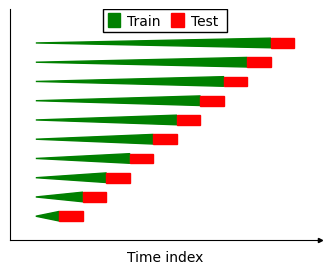

In [120]:
# PLOT 4

# Create a figure and axis
fig, ax = plt.subplots(figsize=(fig_width, fig_height))

# Set axis limits
ax.set_xlim(x_lims)
ax.set_ylim(y_lims)

# Set partitions
num_partitions = 10
test_size=x_width_sh*(1/(num_partitions+1))
bar_height=y_height_sh*0.5/num_partitions

for i in range(1, num_partitions+1):

    # Train triangle
    #   Define the points based on the points of the rectangle
    x_pos=x_lims_sh[0]
    y_pos=y_lims_sh[0]+bar_height*(2*i-2)
    width=test_size*i
    height=bar_height
    tr_n = patches.Rectangle((x_pos, y_pos), width=width, height=height, color=color_train)

    points = [[x_pos, y_pos+bar_height*0.5], [x_pos+width, y_pos], [x_pos+width, y_pos+bar_height]] #the points to trace the edges.
    polygon= plt.Polygon(points,  color='green')
    ax.add_patch(polygon)

    # Test rectangle
    x_pos=tr_n.get_x()+tr_n.get_width()
    y_pos=tr_n.get_y()
    width=test_size
    height=bar_height
    te_n = patches.Rectangle((x_pos, y_pos), width=width, height=height, color=color_test)
    ax.add_patch(te_n)

# Tidy plot
tidy_plot(ax, x_lims=x_lims)

# Create a legend-like box
legend_box = patches.Rectangle((x_lims[1]*0.3, y_lims[1]*0.9), width=x_lims[1]/2.5, 
                               height=y_lims[1]/10, edgecolor='black', facecolor='none')
ax.add_patch(legend_box)

# Add squares and labels to the legend box
color_square1 = patches.Rectangle((legend_box.get_x()*1.05, legend_box.get_y()*1.025), 
        width=legend_box.get_width()*0.1, height=legend_box.get_height()*0.6, 
        color=color_train)
ax.add_patch(color_square1)
ax.text(color_square1.get_x()*1.2, color_square1.get_y()*1.03, 'Train', 
        verticalalignment='center', horizontalalignment='left')

color_square2 = patches.Rectangle((color_square1.get_x()*1.65, color_square1.get_y()), 
        width=legend_box.get_width()*0.1, height=legend_box.get_height()*0.6, 
        color=color_test)
ax.add_patch(color_square2)
ax.text(color_square2.get_x()*1.125, color_square2.get_y()*1.03, 'Test', 
        verticalalignment='center', horizontalalignment='left')

# Save plot
path_ =  os.path.join(os.getcwd(), path_data_out, 'Weighted_rolling_origin_recalibration.png')
plt.savefig(path_, dpi=250)

# Display the plot
plt.show()

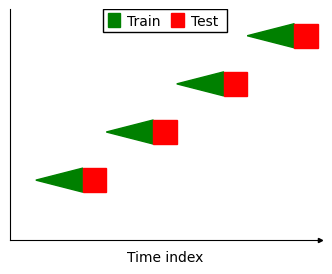

In [121]:
# PLOT 5

# Create a figure and axis
fig, ax = plt.subplots(figsize=(fig_width, fig_height))

# Set axis limits
ax.set_xlim(x_lims)
ax.set_ylim(y_lims)

# Set limits for shapes
factor_ = 2.5
y_lims_sh_ = [value * factor_ for value in y_lims_sh]
y_height_sh_ =y_lims_sh_[1]-y_lims_sh_[0]

# Set partitions
num_partitions = 10
test_size=x_width_sh*(1/(num_partitions+1))
bar_height=y_height_sh_*0.5/num_partitions

for i in range(1, num_partitions+1):    

    # Train triangle
    #   Define the points based on the points of the rectangle
    width=test_size*2
    height=bar_height
    x_pos=x_lims_sh[0] + (i-1)*(width+test_size)
    y_pos=y_lims_sh_[0]+bar_height*(2*i-2)
    tr_n = patches.Rectangle((x_pos, y_pos), width=width, height=height, color=color_train)

    points = [[x_pos, y_pos+bar_height*0.5], [x_pos+width, y_pos], [x_pos+width, y_pos+bar_height]] #the points to trace the edges.
    polygon= plt.Polygon(points,  color='green')
    ax.add_patch(polygon)

    # Test rectangle
    x_pos=tr_n.get_x()+tr_n.get_width()
    y_pos=tr_n.get_y()
    width=test_size
    height=bar_height
    te_n = patches.Rectangle((x_pos, y_pos), width=width, height=height, color=color_test)
    ax.add_patch(te_n)

# Tidy plot
tidy_plot(ax, x_lims=x_lims)

# Create a legend-like box
legend_box = patches.Rectangle((x_lims[1]*0.3, y_lims[1]*0.9), width=x_lims[1]/2.5, 
                               height=y_lims[1]/10, edgecolor='black', facecolor='none')
ax.add_patch(legend_box)

# Add squares and labels to the legend box
color_square1 = patches.Rectangle((legend_box.get_x()*1.05, legend_box.get_y()*1.025), 
        width=legend_box.get_width()*0.1, height=legend_box.get_height()*0.6, 
        color=color_train)
ax.add_patch(color_square1)
ax.text(color_square1.get_x()*1.2, color_square1.get_y()*1.03, 'Train', 
        verticalalignment='center', horizontalalignment='left')

color_square2 = patches.Rectangle((color_square1.get_x()*1.65, color_square1.get_y()), 
        width=legend_box.get_width()*0.1, height=legend_box.get_height()*0.6, 
        color=color_test)
ax.add_patch(color_square2)
ax.text(color_square2.get_x()*1.125, color_square2.get_y()*1.03, 'Test', 
        verticalalignment='center', horizontalalignment='left')

# Save plot
path_ =  os.path.join(os.getcwd(), path_data_out, 'Weighted_rolling_window_recalibration.png')
plt.savefig(path_, dpi=250)

# Display the plot
plt.show()

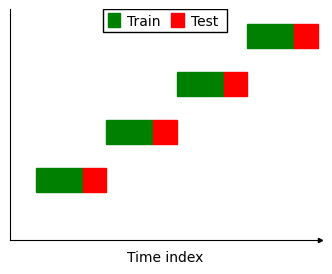

In [122]:
# PLOT 7

# Create a figure and axis
fig, ax = plt.subplots(figsize=(fig_width, fig_height))

# Set axis limits
ax.set_xlim(x_lims)
ax.set_ylim(y_lims)

# Set limits for shapes
factor_ = 2.5
y_lims_sh_ = [value * factor_ for value in y_lims_sh]
y_height_sh_ =y_lims_sh_[1]-y_lims_sh_[0]

# Set partitions
num_partitions = 10
test_size=x_width_sh*(1/(num_partitions+1))
bar_height=y_height_sh_*0.5/num_partitions

for i in range(1, num_partitions+1):    

    # Train triangle
    #   Define the points based on the points of the rectangle
    width=test_size*2
    height=bar_height
    x_pos=x_lims_sh[0] + (i-1)*(width+test_size)
    y_pos=y_lims_sh_[0]+bar_height*(2*i-2)
    tr_n = patches.Rectangle((x_pos, y_pos), width=width, height=height, color=color_train)
    ax.add_patch(tr_n)

    # Test rectangle
    x_pos=tr_n.get_x()+tr_n.get_width()
    y_pos=tr_n.get_y()
    width=test_size
    height=bar_height
    te_n = patches.Rectangle((x_pos, y_pos), width=width, height=height, color=color_test)
    ax.add_patch(te_n)

# Tidy plot
tidy_plot(ax, x_lims=x_lims)

# Create a legend-like box
legend_box = patches.Rectangle((x_lims[1]*0.3, y_lims[1]*0.9), width=x_lims[1]/2.5, 
                               height=y_lims[1]/10, edgecolor='black', facecolor='none')
ax.add_patch(legend_box)

# Add squares and labels to the legend box
color_square1 = patches.Rectangle((legend_box.get_x()*1.05, legend_box.get_y()*1.025), 
        width=legend_box.get_width()*0.1, height=legend_box.get_height()*0.6, 
        color=color_train)
ax.add_patch(color_square1)
ax.text(color_square1.get_x()*1.2, color_square1.get_y()*1.03, 'Train', 
        verticalalignment='center', horizontalalignment='left')

color_square2 = patches.Rectangle((color_square1.get_x()*1.65, color_square1.get_y()), 
        width=legend_box.get_width()*0.1, height=legend_box.get_height()*0.6, 
        color=color_test)
ax.add_patch(color_square2)
ax.text(color_square2.get_x()*1.125, color_square2.get_y()*1.03, 'Test', 
        verticalalignment='center', horizontalalignment='left')

# Save plot
path_ =  os.path.join(os.getcwd(), path_data_out, 'Rolling_window_recalibration.png')
plt.savefig(path_, dpi=250)

# Display the plot
plt.show()

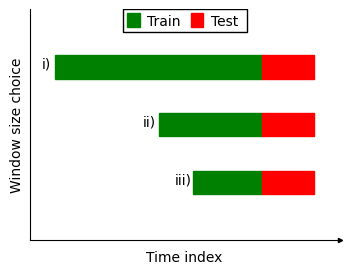

In [123]:
# PLOT 8

# Create a figure and axis
fig, ax = plt.subplots(figsize=(fig_width, fig_height))

# Set axis limits
ax.set_xlim(x_lims)
ax.set_ylim(y_lims)

# Bar height
bar_height = y_lims[1]*0.1

# Green rectangle 1
x_pos=x_lims_sh[0]
y_pos=y_lims[1]*0.7
width=x_width_sh*0.8
height=bar_height
gr1 = patches.Rectangle((x_pos, y_pos), width=width, height=height, 
                        color=color_train)
ax.add_patch(gr1)

# Red rectangle 1
x_pos=gr1.get_x() + gr1.get_width()
y_pos=gr1.get_y()
width=gr1.get_width()/4 # 80-20 split, 1:4 ratio
height=bar_height
rr1 = patches.Rectangle((x_pos, y_pos), width=width, height=height, color=color_test)
ax.add_patch(rr1)

# Green rectangle 2
width=gr1.get_width()/2
x_pos=(gr1.get_x() + gr1.get_width()) - width
height=bar_height
y_pos=y_lims[1]*0.45
gr2 = patches.Rectangle((x_pos, y_pos), width=width, height=height, 
                        color=color_train)
ax.add_patch(gr2)

# Red rectangle 2
x_pos=gr2.get_x() + gr2.get_width()
y_pos=gr2.get_y()
width=rr1.get_width()
height=bar_height
rr2 = patches.Rectangle((x_pos, y_pos), width=width, height=height, color=color_test)
ax.add_patch(rr2)

# Green rectangle 3
width=gr1.get_width()/3
x_pos=(gr1.get_x() + gr1.get_width()) - width
height=bar_height
y_pos=y_lims[1]*0.2
gr3 = patches.Rectangle((x_pos, y_pos), width=width, height=height, 
                        color=color_train)
ax.add_patch(gr3)

# Red rectangle 3
x_pos=gr3.get_x() + gr3.get_width()
y_pos=gr3.get_y()
width=rr1.get_width()
height=bar_height
rr3 = patches.Rectangle((x_pos, y_pos), width=width, height=height, color=color_test)
ax.add_patch(rr3)

# Tidy plot
tidy_plot(ax, x_lims=x_lims)

# Set Y axis title
ax.set_ylabel('Window size choice')

# Add anotations
ax.annotate('i)', xy=(gr1.get_x()-gr1.get_width()/15, gr1.get_y() + gr1.get_height()/2.2))
ax.annotate('ii)', xy=(gr2.get_x()-gr1.get_width()/13, gr2.get_y() + gr1.get_height()/2.2))
ax.annotate('iii)', xy=(gr3.get_x()-gr1.get_width()/11, gr3.get_y() + gr1.get_height()/2.2))

# Create a legend-like box
legend_box = patches.Rectangle((x_lims[1]*0.3, y_lims[1]*0.9), width=x_lims[1]/2.5, 
                               height=y_lims[1]/10, edgecolor='black', facecolor='none')
ax.add_patch(legend_box)

# Add squares and labels to the legend box
color_square1 = patches.Rectangle((legend_box.get_x()*1.05, legend_box.get_y()*1.025), 
        width=legend_box.get_width()*0.1, height=legend_box.get_height()*0.6, 
        color=color_train)
ax.add_patch(color_square1)
ax.text(color_square1.get_x()*1.2, color_square1.get_y()*1.03, 'Train', 
        verticalalignment='center', horizontalalignment='left')

color_square2 = patches.Rectangle((color_square1.get_x()*1.65, color_square1.get_y()), 
        width=legend_box.get_width()*0.1, height=legend_box.get_height()*0.6, 
        color=color_test)
ax.add_patch(color_square2)
ax.text(color_square2.get_x()*1.125, color_square2.get_y()*1.03, 'Test', 
        verticalalignment='center', horizontalalignment='left')


# Save plot
path_ =  os.path.join(os.getcwd(), path_data_out, 'DifferentWindowSizes.png')
plt.savefig(path_, dpi=250)

# Display the plot
plt.show()

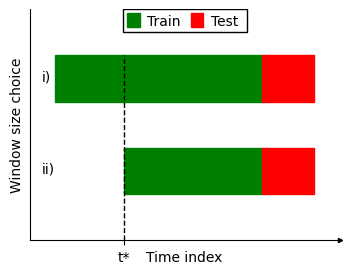

In [128]:
# PLOT 

# Create a figure and axis
fig, ax = plt.subplots(figsize=(fig_width, fig_height))

# Set axis limits
ax.set_xlim(x_lims)
ax.set_ylim(y_lims)

# Green rectangle 1
x_pos=x_lims_sh[0]
y_pos=y_lims[1]*0.6
width=x_width_sh*0.8
height=(y_lims[1]*0.2)
gr1 = patches.Rectangle((x_pos, y_pos), width=width, height=height, 
                        color=color_train)
ax.add_patch(gr1)

# Red rectangle 1
x_pos=gr1.get_x() + gr1.get_width()
y_pos=gr1.get_y()
width=gr1.get_width()/4 # 80-20 split, 1:4 ratio
height=gr1.get_height()
rr1 = patches.Rectangle((x_pos, y_pos), width=width, height=height, color=color_test)
ax.add_patch(rr1)

# Green rectangle 2
width=gr1.get_width()/1.5
x_pos=(gr1.get_x() + gr1.get_width()) - width
height=gr1.get_height()
y_pos=y_lims[1]*0.2

# x_pos=gr1.get_x()
# y_pos=y_lims[1]*0.2
# width=gr1.get_width()
# height=gr1.get_height()
gr2 = patches.Rectangle((x_pos, y_pos), width=width, height=height, color=color_train)
ax.add_patch(gr2)

# Red rectangle 2
x_pos=gr1.get_x() + gr1.get_width()
y_pos=gr2.get_y()
width=gr1.get_width()/4 # 80-20 split, 1:4 ratio
height=gr1.get_height()
rr1 = patches.Rectangle((x_pos, y_pos), width=width, height=height, color=color_test)
ax.add_patch(rr1)



# Tidy plot
tidy_plot(ax, x_lims=x_lims)

# Redfine X ticks
ax.tick_params(bottom=True, left=False, labelleft=False)
ax.set_xticks([gr2.get_x()])
ax.set_xticklabels(['t*'])

# draw vertical line
plt.plot([gr2.get_x(), gr2.get_x()], [0, gr1.get_y()+gr1.get_height()], '--', lw=1, color="black")

# Set X axis title
plt.xlabel('Time index', labelpad=-10)

# Set Y axis title
ax.set_ylabel('Window size choice')


# Add anotations
ax.annotate('i)', xy=(gr1.get_x()-gr1.get_width()/15, gr1.get_y() + gr1.get_height()/2.2))
ax.annotate('ii)', xy=(gr1.get_x()-gr1.get_width()/15, gr2.get_y() + gr2.get_height()/2.2))

# Create a legend-like box
legend_box = patches.Rectangle((x_lims[1]*0.3, y_lims[1]*0.9), width=x_lims[1]/2.5, 
                               height=y_lims[1]/10, edgecolor='black', facecolor='none')
ax.add_patch(legend_box)

# Add squares and labels to the legend box
color_square1 = patches.Rectangle((legend_box.get_x()*1.05, legend_box.get_y()*1.025), 
        width=legend_box.get_width()*0.1, height=legend_box.get_height()*0.6, 
        color=color_train)
ax.add_patch(color_square1)
ax.text(color_square1.get_x()*1.2, color_square1.get_y()*1.03, 'Train', 
        verticalalignment='center', horizontalalignment='left')

color_square2 = patches.Rectangle((color_square1.get_x()*1.65, color_square1.get_y()), 
        width=legend_box.get_width()*0.1, height=legend_box.get_height()*0.6, 
        color=color_test)
ax.add_patch(color_square2)
ax.text(color_square2.get_x()*1.125, color_square2.get_y()*1.03, 'Test', 
        verticalalignment='center', horizontalalignment='left')

# Save plot
path_ =  os.path.join(os.getcwd(), path_data_out, 'RelevantEvent.png')
plt.savefig(path_, dpi=250)

# Display the plot
plt.show()